In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Mall_Customers.csv') 

In [3]:
df = df.drop(["CustomerID"], axis=1)

In [4]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


/var/folders/wc/khxb4zsj41g41ycbv7f_3fr00000gn/T/ipykernel_3731/2448198415.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


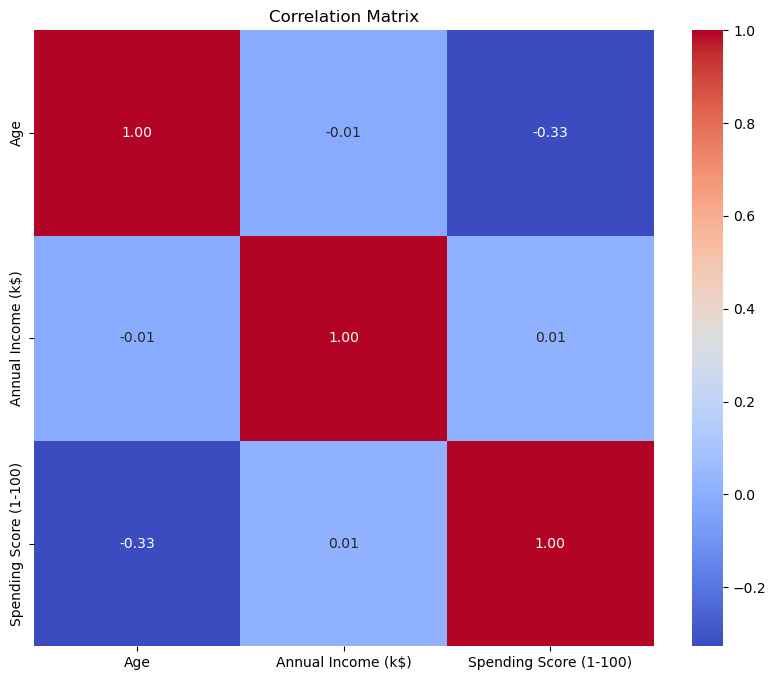

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

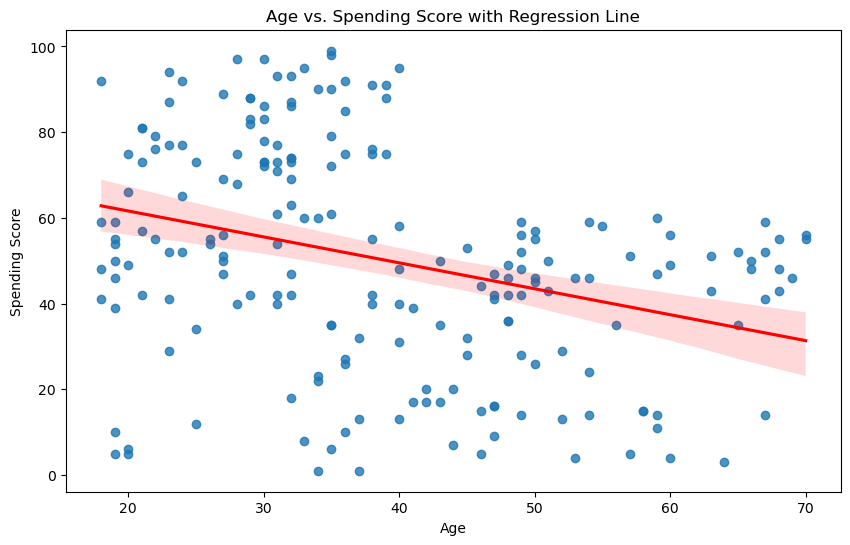

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Spending Score (1-100)', data=df, line_kws={"color": "red"})
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs. Spending Score with Regression Line')
plt.show()

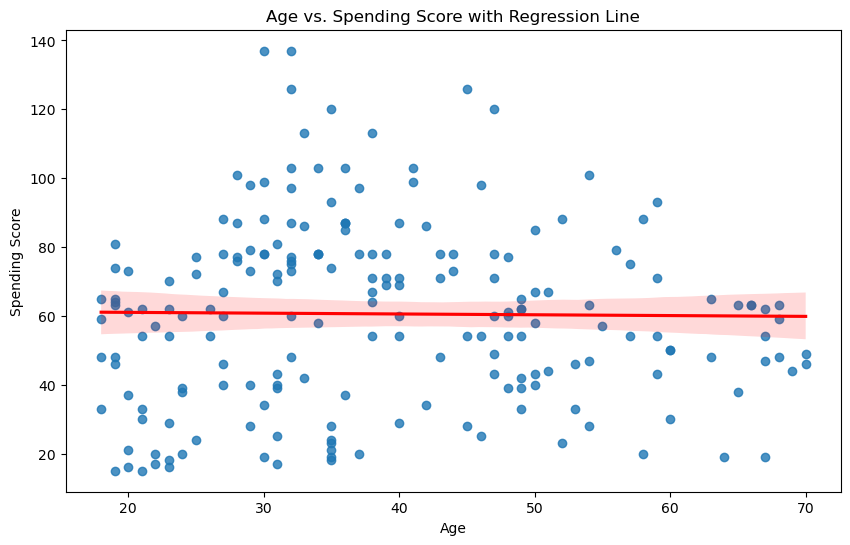

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Annual Income (k$)', data=df, line_kws={"color": "red"})
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs. Spending Score with Regression Line')
plt.show()

In [8]:
# Define bins and labels
age_bins = range(0, 160, 10)  # Age ranges
age_labels = range(len(age_bins) - 1)  # Labels 0, 1, 2,...

# Binning 'Age' column with integer labels
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


In [9]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Age Group
0,Male,19,15,39,1
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,3
196,Female,45,126,28,4
197,Male,32,126,74,3
198,Male,32,137,18,3


In [10]:
X = df.drop(["Age", "Genre"], axis=1)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [11]:
X

,Annual Income (k$),Spending Score (1-100),Age Group
0,15,39,1
1,15,81,2
2,16,6,2
3,16,77,2
4,17,40,3
...,...,...,...
195,120,79,3
196,126,28,4
197,126,74,3
198,137,18,3


In [12]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X = scaler.fit_transform(X)

In [13]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

/Users/rachanmurthy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rachanmurthy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rachanmurthy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rachanmurthy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

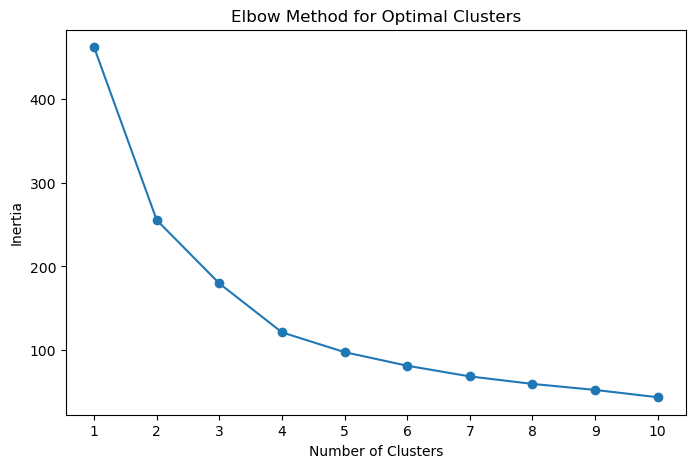

In [14]:
# Define the range for the number of clusters to try
range_n_clusters = range(1, 11)
inertia_values = []

# Calculate inertia for each number of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to find the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(range_n_clusters)
plt.show()

In [15]:
kmeans.fit(X)

/Users/rachanmurthy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=0)

In [16]:
# Get the coordinates of cluster centers
centers = kmeans.cluster_centers_
print("Cluster centers:", centers)

Cluster centers: [[ 0.69733393 -0.91869518]
 [-1.32809982  1.75919702]
 [-1.27600765 -1.45348985]
 [-0.70140322 -0.35994775]
 [ 1.34237757  0.97072832]
 [ 0.64179745  2.0508812 ]
 [ 2.06898968 -1.15673162]
 [ 0.28263872  0.23522561]
 [-1.19521595  0.50837194]
 [ 1.27064988 -0.12637424]]


/Users/rachanmurthy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


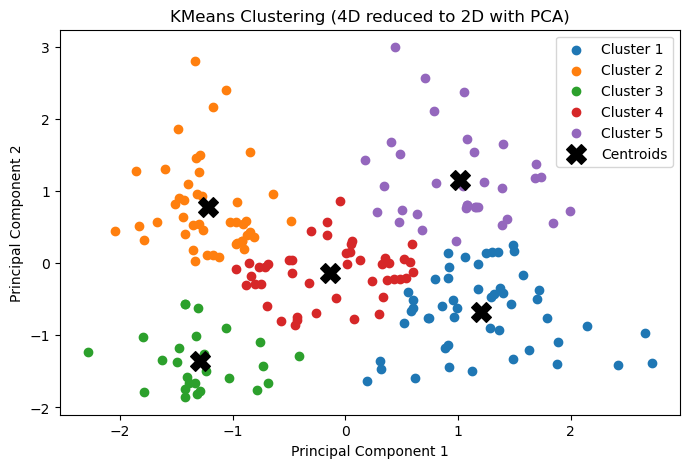

In [17]:
# Fit KMeans to the dataset
n_clusters = 5  # Replace with your chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Use PCA to reduce the 4D data to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Plot the clusters in 2D
plt.figure(figsize=(8, 5))
for i in range(n_clusters):
    plt.scatter(X_2d[labels == i, 0], X_2d[labels == i, 1], label=f'Cluster {i+1}')

# Plot the cluster centers (also reduced to 2D using PCA)
centers_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title("KMeans Clustering (4D reduced to 2D with PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()